In [255]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/123-of-ai-presents-stoke-prediction/sample_submission.csv
/kaggle/input/123-of-ai-presents-stoke-prediction/stroke_train_set_dirty.csv
/kaggle/input/123-of-ai-presents-stoke-prediction/stroke_test_set_nogt.csv


In [256]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

# **Pre-processing**

In [257]:
# Reading the Training Data
df = pd.read_csv("/kaggle/input/123-of-ai-presents-stoke-prediction/stroke_train_set_dirty.csv")

In [258]:
# 1. Displaying the first 10 records
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,47.0,0.0,0.0,NaN,Private,Urban,63.98,26.8,smokes,NaN
1,Male,54.0,0.0,NaN,NaN,Private,Urban,86.26,35.1,formerly smoked,0.0
2,Female,3.0,0.0,0.0,No,children,Rural,68.34,18.0,Unknown,0.0
3,Female,62.0,0.0,0.0,NaN,Private,Rural,226.38,47.4,never smoked,NaN
4,Female,27.0,0.0,0.0,Yes,Private,NaN,85.60,21.4,Unknown,0.0
5,Male,39.0,0.0,0.0,Yes,NaN,Urban,164.67,33.8,Unknown,0.0
6,Female,47.0,0.0,0.0,Yes,Private,Rural,195.04,45.5,never smoked,0.0
7,Male,1.8,0.0,0.0,No,children,NaN,153.31,17.1,Unknown,0.0
8,Male,41.0,0.0,0.0,Yes,Private,Urban,104.34,NaN,Unknown,0.0
9,Female,47.0,0.0,0.0,Yes,Private,NaN,68.48,NaN,never smoked,0.0


In [259]:
# 2. Check dataset info - field types, non-null values, dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3671 non-null   object 
 1   age                3698 non-null   float64
 2   hypertension       3663 non-null   float64
 3   heart_disease      3668 non-null   float64
 4   ever_married       3678 non-null   object 
 5   work_type          3669 non-null   object 
 6   Residence_type     3663 non-null   object 
 7   avg_glucose_level  3682 non-null   float64
 8   bmi                3524 non-null   float64
 9   smoking_status     3633 non-null   object 
 10  stroke             3675 non-null   float64
dtypes: float64(6), object(5)
memory usage: 351.4+ KB


In [260]:
# 3a. Pre-processing (Cleaning): Address missing (NULL) values - drop or imputation
#df_imp = df.dropna(subset=['hypertension', 'heart_disease','stroke','smoking_status'])  # Rows with missing 'name' or 'toy' were banished.
df_imp = df.dropna(subset=['stroke'])

df_imp = df_imp.fillna({'work_type':'Private'})
df_imp[['Residence_type']]= df_imp[['Residence_type']].fillna(method='ffill')
#df_imp.dropna(subset=['age'], inplace=True)
avg_age = df_imp['age'].mean()
df_imp = df_imp.fillna({'age':avg_age})

avg_glucose_median = df_imp['avg_glucose_level'].median()
bmi_median = df_imp['bmi'].median()
df_imp=df_imp.fillna({'avg_glucose_level':avg_glucose_median})
df_imp=df_imp.fillna({'bmi':bmi_median})

df_imp = df_imp.fillna({'ever_married':'Yes'})
df_imp = df_imp.fillna({'smoking_status':'Unknown'})
df_imp = df_imp.fillna({'hypertension':1.0})
df_imp = df_imp.fillna({'heart_disease':0.0})
df_imp = df_imp.fillna({'gender':'Male'})

df_imp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3675 entries, 1 to 4087
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3675 non-null   object 
 1   age                3675 non-null   float64
 2   hypertension       3675 non-null   float64
 3   heart_disease      3675 non-null   float64
 4   ever_married       3675 non-null   object 
 5   work_type          3675 non-null   object 
 6   Residence_type     3675 non-null   object 
 7   avg_glucose_level  3675 non-null   float64
 8   bmi                3675 non-null   float64
 9   smoking_status     3675 non-null   object 
 10  stroke             3675 non-null   float64
dtypes: float64(6), object(5)
memory usage: 344.5+ KB


/tmp/ipykernel_33/1801242129.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imp[['Residence_type']]= df_imp[['Residence_type']].fillna(method='ffill')


In [261]:
# 3b. Pre-processing (Cleaning): Remove Duplicate Rows
df_imp = df_imp.drop_duplicates()
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 1 to 4087
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3672 non-null   object 
 1   age                3672 non-null   float64
 2   hypertension       3672 non-null   float64
 3   heart_disease      3672 non-null   float64
 4   ever_married       3672 non-null   object 
 5   work_type          3672 non-null   object 
 6   Residence_type     3672 non-null   object 
 7   avg_glucose_level  3672 non-null   float64
 8   bmi                3672 non-null   float64
 9   smoking_status     3672 non-null   object 
 10  stroke             3672 non-null   float64
dtypes: float64(6), object(5)
memory usage: 344.2+ KB


In [262]:
# 3c. Pre-processing (Cleaning): Drop irrelevant columns (that you don't want to give as input to the model)
#df_imp = df_imp.drop(columns=["id"])

In [263]:
# 3d. Pre-processing (Encoding): Convert categorical values to numeric
# Use df['col_name'].value_counts() to find out all the categories available per column

df_imp = pd.get_dummies(df_imp, columns = ['gender','ever_married','work_type','Residence_type','smoking_status']) # Pandas function to convert 'objects' (categorical) to one-hot (new col per category)
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 1 to 4087
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             3672 non-null   float64
 1   hypertension                    3672 non-null   float64
 2   heart_disease                   3672 non-null   float64
 3   avg_glucose_level               3672 non-null   float64
 4   bmi                             3672 non-null   float64
 5   stroke                          3672 non-null   float64
 6   gender_Female                   3672 non-null   bool   
 7   gender_Male                     3672 non-null   bool   
 8   gender_Other                    3672 non-null   bool   
 9   ever_married_No                 3672 non-null   bool   
 10  ever_married_Yes                3672 non-null   bool   
 11  work_type_Govt_job              3672 non-null   bool   
 12  work_type_Never_worked          3672 no

In [264]:
# 4a. Data understanding - Find out stats regarding your data (df.describe(), df.mean(), df.median())
df_imp.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,43.249783,0.195261,0.050381,104.511179,28.688889,0.050381
std,21.497844,0.396456,0.218760,43.043899,7.342181,0.218760
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,28.000000,0.000000,0.000000,78.560000,24.200000,0.000000
50%,43.238967,0.000000,0.000000,91.850000,28.000000,0.000000
75%,59.000000,0.000000,0.000000,111.085000,32.100000,0.000000
max,82.000000,1.000000,1.000000,267.760000,97.600000,1.000000


In [265]:
df_imp.mean()

age                                43.249783
hypertension                        0.195261
heart_disease                       0.050381
avg_glucose_level                 104.511179
bmi                                28.688889
stroke                              0.050381
gender_Female                       0.525599
gender_Male                         0.474129
gender_Other                        0.000272
ever_married_No                     0.312908
ever_married_Yes                    0.687092
work_type_Govt_job                  0.120370
work_type_Never_worked              0.002996
work_type_Private                   0.608660
work_type_Self-employed             0.144608
work_type_children                  0.123366
Residence_type_Rural                0.484477
Residence_type_Urban                0.515523
smoking_status_Unknown              0.383715
smoking_status_formerly smoked      0.154139
smoking_status_never smoked         0.325708
smoking_status_smokes               0.136438
dtype: flo

In [266]:
df_imp.median()

age                               43.238967
hypertension                       0.000000
heart_disease                      0.000000
avg_glucose_level                 91.850000
bmi                               28.000000
stroke                             0.000000
gender_Female                      1.000000
gender_Male                        0.000000
gender_Other                       0.000000
ever_married_No                    0.000000
ever_married_Yes                   1.000000
work_type_Govt_job                 0.000000
work_type_Never_worked             0.000000
work_type_Private                  1.000000
work_type_Self-employed            0.000000
work_type_children                 0.000000
Residence_type_Rural               0.000000
Residence_type_Urban               1.000000
smoking_status_Unknown             0.000000
smoking_status_formerly smoked     0.000000
smoking_status_never smoked        0.000000
smoking_status_smokes              0.000000
dtype: float64

<Axes: xlabel='age', ylabel='stroke'>

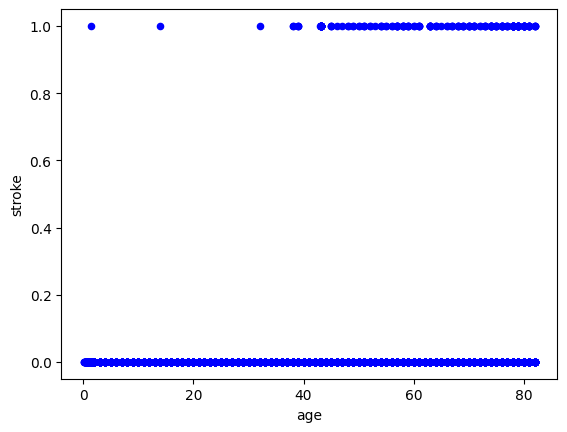

In [267]:
# 4b. Data understanding - Make use of plots to build more understanding of the data
# Hint: Can use df.plot()
df_imp.plot(kind='scatter',x='age',y='stroke',color='blue')
# People with Age above 40 are having more chances to get a stroke as per the plot below

<Axes: xlabel='bmi', ylabel='stroke'>

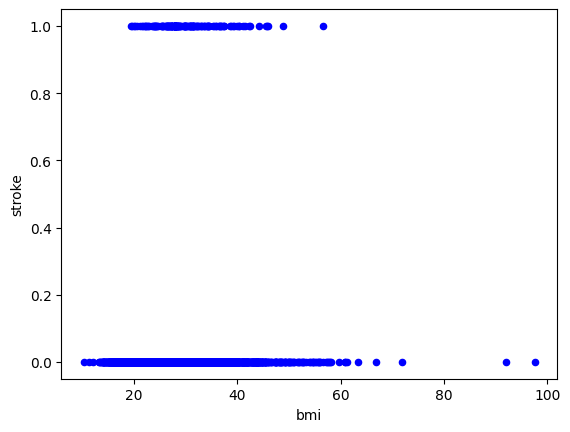

In [268]:
df_imp.plot(kind='scatter',x='bmi',y='stroke',color='blue')

<Axes: xlabel='avg_glucose_level', ylabel='stroke'>

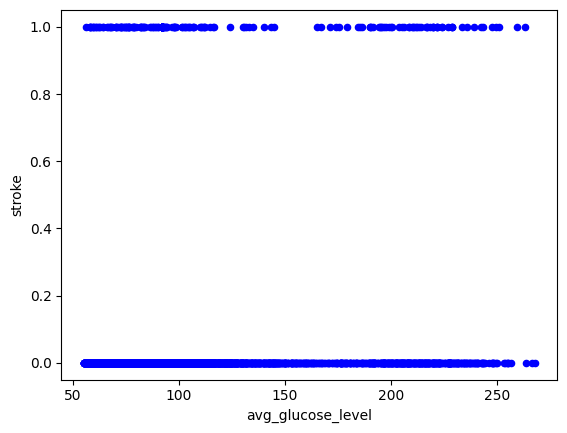

In [269]:
df_imp.plot(kind='scatter',x='avg_glucose_level',y='stroke',color='blue')

/tmp/ipykernel_33/1640043193.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


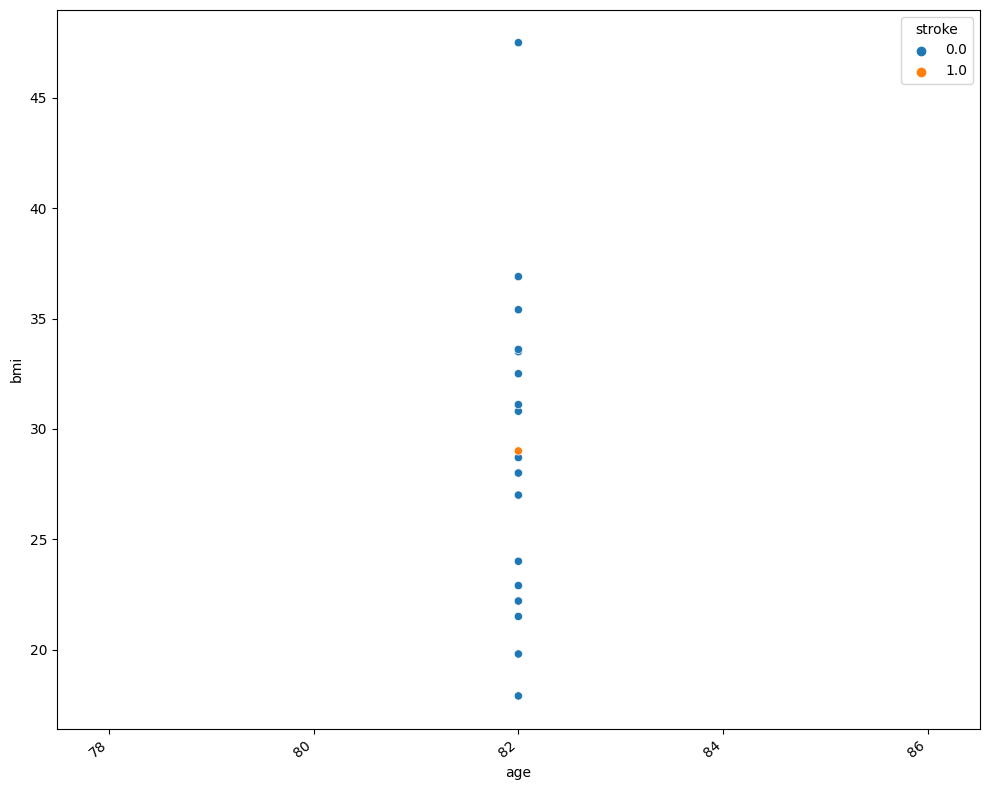

In [270]:
# 4b. (Optional) Create More plots to understand the relationship b/w different variables

# Example: Top 20 actors of movies based on the imdb rating of the movies

plt.figure(figsize=(10, 8))

# Create a new dataframe with top 20 values
new_df = df_imp.sort_values(by ='age' , ascending=False)
new_df = new_df.head(20)

# plotting
ax=sns.scatterplot(x=new_df['age'], y=new_df['bmi'], hue=new_df['stroke'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [271]:
# 4c. Find out which input features are the most important
# Hint: Start out with df.corr(). Can visualise with seaborn library
df_imp.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.180541,0.255989,0.215696,0.282819,0.225417,0.006031,-0.005593,-0.013245,-0.599440,...,-0.057556,0.106665,0.292242,-0.578314,0.007380,-0.007380,-0.296043,0.211215,0.101484,0.058666
hypertension,0.180541,1.000000,0.074994,0.106370,0.105745,0.065571,-0.020437,0.019331,0.033506,-0.127948,...,-0.027001,0.006462,0.065079,-0.086599,0.000866,-0.000866,-0.077876,0.027554,0.038800,0.028369
heart_disease,0.255989,0.074994,1.000000,0.167408,0.045937,0.123404,-0.070403,0.070530,-0.003802,-0.090995,...,-0.012626,0.008668,0.068137,-0.082621,0.013383,-0.013383,-0.048613,0.046495,-0.016621,0.042652
avg_glucose_level,0.215696,0.106370,0.167408,1.000000,0.171072,0.127724,-0.043033,0.042542,0.014887,-0.137577,...,-0.013911,0.006897,0.071479,-0.088794,-0.002682,0.002682,-0.092274,0.045233,0.031646,0.039937
bmi,0.282819,0.105745,0.045937,0.171072,1.000000,0.038712,0.009854,-0.009387,-0.014139,-0.283171,...,-0.016140,0.166045,0.080889,-0.398928,0.014769,-0.014769,-0.207093,0.095133,0.090809,0.069336
stroke,0.225417,0.065571,0.123404,0.127724,0.038712,1.000000,0.004399,-0.004273,-0.003802,-0.104421,...,-0.012626,-0.011740,0.078757,-0.078835,-0.009039,0.009039,-0.048613,0.056839,-0.000680,0.010007
gender_Female,0.006031,-0.020437,-0.070403,-0.043033,0.009854,0.004399,1.000000,-0.999454,-0.017373,-0.028127,...,-0.017779,0.020434,0.037072,-0.073130,-0.012049,0.012049,-0.034284,-0.043030,0.088891,-0.027527
gender_Male,-0.005593,0.019331,0.070530,0.042542,-0.009387,-0.004273,-0.999454,1.000000,-0.015672,0.028496,...,0.017810,-0.020872,-0.036848,0.073336,0.011486,-0.011486,0.034715,0.041753,-0.088515,0.027745
gender_Other,-0.013245,0.033506,-0.003802,0.014887,-0.014139,-0.003802,-0.017373,-0.015672,1.000000,-0.011138,...,-0.000905,0.013234,-0.006786,-0.006192,0.017025,-0.017025,-0.013023,0.038663,-0.011471,-0.006560
ever_married_No,-0.599440,-0.127948,-0.090995,-0.137577,-0.283171,-0.104421,-0.028127,0.028496,-0.011138,1.000000,...,0.070479,-0.138815,-0.165583,0.491593,0.002745,-0.002745,0.253768,-0.154698,-0.070482,-0.100555


<Axes: >

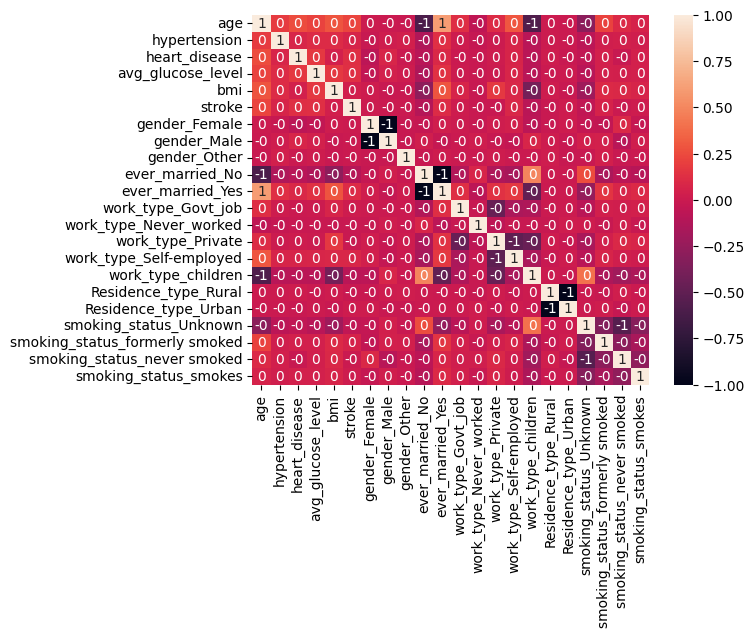

In [272]:
sns.heatmap(df_imp.corr(), annot=True, fmt='.0f')
# Some Observations:
# Age and Married - Yes
# Age and Bmi
# Age and heart disease
# Age and Formely smoked

In [273]:
# Any other relevant pre-processing (upto your exploration)

# **Model Development**

In [274]:
# 1. Divide dataframe into input and output
# X = df.drop(columns=['output_class']) -> Drop the column to be predicted
# y = df['output_class'] -> Choose Output column to be predicted
X = df_imp.drop(columns=['stroke'])
y = df_imp['stroke']


from imblearn.combine import SMOTEENN
sme = SMOTEENN()
X, y = sme.fit_resample(X, y)
#print(y_res.value_counts())

In [275]:
# 2. Perform Feature Selection - Experiment with the best one!
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

feat_selector = SelectKBest(mutual_info_classif, k=3)
X = feat_selector.fit_transform(X, y)
chosen_features = feat_selector.get_feature_names_out()

In [276]:
# Usually, we do a train-test split, but, in the hackathon, we'll already provide you with the separate datasets for each
chosen_features

array(['age', 'hypertension', 'bmi'], dtype=object)

In [277]:
# 3. Data Normalisation: Bring into the range 0 to 1, or -1 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(X)
scaled_data

array([[0.03564453, 0.        , 0.0882016 ],
       [0.32861328, 0.        , 0.12714777],
       [0.47509766, 0.        , 0.26918671],
       ...,
       [0.52684286, 0.81625892, 0.2008549 ],
       [0.84066988, 0.31589218, 0.23331066],
       [0.9553442 , 0.        , 0.24044693]])

In [278]:
# 4. Choose Model(s), fit
### Experiment with different models.
### https://scikit-learn.org/stable/supervised_learning.html

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import f1_score

clf = LogisticRegression().fit(X, y)
predictions = clf.predict(X)
accuracy = f1_score(y, predictions)
print(accuracy)


clf_svm = svm.SVC(class_weight='balanced')
clf_svm.fit(X, y)
predictions_svm = clf_svm.predict(X)
accuracy_svm = f1_score(y, predictions_svm)
print(accuracy_svm)

clf_rf = RandomForestClassifier()
clf_rf.fit(X, y)
predictions_rf = clf_rf.predict(X)
accuracy_rf = f1_score(y, predictions_rf)
print(accuracy_rf)

0.8224834237492467
0.8336352657004831
0.99327011318446


In [279]:
# 5. Evaluate with relevant metric for your problem. Eg: accuracy_score(), r2_score()
score = clf.score(X, y)
print(score)

score_svm = clf_svm.score(X, y)
print(score_svm)

score_rf = clf_rf.score(X, y)
print(score_rf)

0.796896551724138
0.81
0.9924137931034482


In [280]:
# 6. After model choice is made, fine-tune with GridSearchCV, or RandomizedSearchCV()
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define your model
#model = RandomForestClassifier()

# Define your parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf_rf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to your data
grid_search.fit(X, y)

# Get the best parameters and the best model
best_params = grid_search.best_params_

print(f"Best Parameters: {best_params}")

# For SVC
param_grid_svm = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
grid_search_svm = GridSearchCV(estimator=clf_svm, param_grid=param_grid_svm)
# Fit the GridSearchCV object to your data
grid_search_svm.fit(X, y)
best_params_svm = grid_search_svm.best_params_

print(f"Best Parameters SVM: {best_params_svm}")


Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200}
Best Parameters SVM: {'C': 10, 'kernel': 'rbf'}


In [281]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression

# # Define your models and parameter grids
# models_and_parameters = {
#     'RandomForestClassifier': (RandomForestClassifier(), 
#                                {'n_estimators': [100, 200], 'max_depth': [5, 10]}),
#     'SVC': (SVC(), 
#             {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
#     'LogisticRegression': (LogisticRegression(), 
#                            {'C': [0.1, 1, 10], 'penalty': ['l2', 'l1']})
# }

# # List to store best models
# best_models = []

# # Loop through the models and parameters
# for model_name, (model, param_grid) in models_and_parameters.items():
#     grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
#     grid_search.fit(X, y)
    
#     best_models.append((model_name, grid_search.best_params_, grid_search.best_score_))

# # Sort and print the best models from best to worst
# best_models.sort(key=lambda x: x[2], reverse=True)
# for model in best_models:
#     print(f"{model[0]}: Best Score: {model[2]}, Best Params: {model[1]}")

#{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}
rfc1=RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 100, max_depth=4, criterion='gini')
rfc1.fit(X,y)

svm1=svm.SVC(C=1, kernel='linear')
svm1.fit(X,y)

SVC(C=1, kernel='linear')

# Testing and Creating Output CSV

In [283]:
# Creating output file for submission - Template Code

#test_pd = pd.read_csv('/kaggle/input/test-imdb/test_data_with_inputs.csv')
test_pd = pd.read_csv('/kaggle/input/123-of-ai-presents-stoke-prediction/stroke_test_set_nogt.csv')

# saving in a new variable to modify
test = test_pd.copy(deep=True)

# Prepare data to be given as an input to your trained model
# 1. Repeat the pre-processing done above. Eg: Conversion to categorical, filling in mean values
#test['bmi'].fillna(test['bmi'].mean(), inplace=True)
#test = pd.get_dummies(test)
#df_imp = test.dropna(subset=['stroke'])
test = test.fillna({'work_type':'Private'})
test[['Residence_type']]= test[['Residence_type']].fillna(method='ffill')
#df_imp.dropna(subset=['age'], inplace=True)
avg_age = test['age'].mean()
test = test.fillna({'age':avg_age})

avg_glucose_median = test['avg_glucose_level'].median()
bmi_median = test['bmi'].median()
test=test.fillna({'avg_glucose_level':avg_glucose_median})
test=test.fillna({'bmi':bmi_median})

test = test.fillna({'ever_married':'Yes'})
test = test.fillna({'smoking_status':'Unknown'})
test = test.fillna({'hypertension':1.0})
test = test.fillna({'heart_disease':0.0})
test = test.fillna({'gender':'Male'})

test = test.drop_duplicates()
test = pd.get_dummies(test, columns = ['gender','ever_married','work_type','Residence_type','smoking_status']) # Pandas function to convert 'objects' (categorical) to one-hot (new col per category)

test.info()

# 2. Use the same features obtained in feature selection
chosen_features = feat_selector.get_feature_names_out() # from above -> getting names of chosen features
test = test[chosen_features]
test.head(5)

# 3. Normalise/Scale the features as done above
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(test)

# 4. Predict and obtain results from the model
y_pred = clf_svm.predict(test)
#y_pred = grid_search.predict(test)


# 5. Save results to CSV
submission = pd.DataFrame({'ID': test_pd.index, 'stroke' : y_pred})
submission.to_csv('output_submission_eval.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             1022 non-null   float64
 1   hypertension                    1022 non-null   int64  
 2   heart_disease                   1022 non-null   int64  
 3   avg_glucose_level               1022 non-null   float64
 4   bmi                             1022 non-null   float64
 5   gender_Female                   1022 non-null   bool   
 6   gender_Male                     1022 non-null   bool   
 7   ever_married_No                 1022 non-null   bool   
 8   ever_married_Yes                1022 non-null   bool   
 9   work_type_Govt_job              1022 non-null   bool   
 10  work_type_Never_worked          1022 non-null   bool   
 11  work_type_Private               1022 non-null   bool   
 12  work_type_Self-employed         10

/tmp/ipykernel_33/150095643.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test[['Residence_type']]= test[['Residence_type']].fillna(method='ffill')
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
